## 2. Data Cleaning

### 2.1 Data Import

In [1]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime
from sklearn.linear_model import LinearRegression
import warnings

In [2]:
# Set max colums display to see all the columns
pd.options.display.max_columns = 80

In [3]:
# Import and take a look at train_df
train_df = pd.read_csv("../data/train.csv")

C:\Users\MichaelKS\AppData\Local\Temp\ipykernel_7220\644010240.py:2: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("../data/train.csv")


### 2.2 Data Check

In [4]:
train_df.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,2016,5,11,10,12,11,4 ROOM Model A,"3B, UPP BOON KENG RD",968.760,701.928238,15,25,2005,Y,N,N,N,N,142,0,0,0,96,46,0,0,0,0,0,0,0,382003,1.314299,103.872828,Kallang,1094.090418,NaN,NaN,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.311540,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.320,475.230826,34,9,1987,Y,N,N,N,N,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,NaN,1.0,3.0,640.151925,NaN,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,838000.0,2013,7,14,13,15,14,EXECUTIVE Apartment,"289B, BT BATOK ST 25",1550.016,540.639580,24,16,1996,Y,N,N,N,N,90,0,0,0,0,30,60,0,0,0,0,0,0,651289,1.343867,103.760535,Bukit Batok,1459.579948,NaN,NaN,4.0,1762.082341,NaN,NaN,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,Blk 289E,1.344064,103.758613,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,550000.0,2012,4,3,1,5,3,4 ROOM Model A,"232, BISHAN ST 22",1108.692,496.080066,29,11,1990,Y,Y,N,N,N,75,0,0,0,68,7,0,0,0,0,0,0,0,570232,1.358245,103.845504,Bishan,950.175199,NaN,1.0,4.0,726.215262,NaN,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,Opp Bishan Nth Shop Mall,1.358045,103.845169,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,298000.0,2017,12,2,1,3,2,4 ROOM Simplified,"876, YISHUN ST 81",893.412,333.552717,34,4,1987,Y,N,N,N,N,48,0,0,0,30,18,0,0,0,0,0,0,0,760876,1.414745,103.835532,Yishun,729.771895,NaN,1.0,2.0,1540.151439,NaN,NaN,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,Blk 873,1.415424,103.836477,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 78 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

### 2.3 Rename Columns

In [6]:
# Change all columns to lowercase
train_df.columns = train_df.columns.str.lower()
train_df.columns

Index(['id', 'tranc_yearmonth', 'town', 'flat_type', 'block', 'street_name',
       'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'resale_price', 'tranc_year', 'tranc_month', 'mid_storey', 'lower',
       'upper', 'mid', 'full_flat_type', 'address', 'floor_area_sqft',
       'price_per_sqft', 'hdb_age', 'max_floor_lvl', 'year_completed',
       'residential', 'commercial', 'market_hawker', 'multistorey_carpark',
       'precinct_pavilion', 'total_dwelling_units', '1room_sold', '2room_sold',
       '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'postal', 'latitude', 'longitude', 'planning_area',
       'mall_nearest_distance', 'mall_within_500m', 'mall_within_1km',
       'mall_within_2km', 'hawker_nearest_distance', 'hawker_within_500m',
       'hawker_within_1km', 'hawker_within_2km', 'hawker_food_stalls',
       'hawker_m

### 2.4 Clean Up Nulls

# Check null

In [7]:
# Check number of null
train_df.isnull().sum()[train_df.isnull().sum()>0]

mall_nearest_distance      829
mall_within_500m         92789
mall_within_1km          25426
mall_within_2km           1940
hawker_within_500m       97390
hawker_within_1km        60868
hawker_within_2km        29202
dtype: int64

In [8]:
# Check null percentage
train_df.isnull().sum()[train_df.isnull().sum()>0] / train_df.shape[0]*100

mall_nearest_distance     0.550341
mall_within_500m         61.598975
mall_within_1km          16.879323
mall_within_2km           1.287890
hawker_within_500m       64.653398
hawker_within_1km        40.407876
hawker_within_2km        19.386062
dtype: float64

In [9]:
# Check mall and hawker with null
train_df[["mall_nearest_distance", "mall_within_500m", "mall_within_1km", "mall_within_2km", "hawker_nearest_distance", "hawker_within_500m", "hawker_within_1km", "hawker_within_2km"]].head()

,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km
0,1094.090418,NaN,NaN,7.0,154.753357,1.0,3.0,13.0
1,866.941448,NaN,1.0,3.0,640.151925,NaN,1.0,7.0
2,1459.579948,NaN,NaN,4.0,1762.082341,NaN,NaN,1.0
3,950.175199,NaN,1.0,4.0,726.215262,NaN,1.0,9.0
4,729.771895,NaN,1.0,2.0,1540.151439,NaN,NaN,1.0


In [10]:
# From the dataframe we can see that null means no mall/hawker within the stated areas
# Replace null with 0 for malls within 500-2km
train_df.fillna(value = {"mall_within_500m":0, "mall_within_1km":0, "mall_within_2km":0}, inplace=True)

In [11]:
# Replace null with 0 for hawkers within 500-2km
train_df.fillna(value = {"hawker_within_500m":0, "hawker_within_1km":0, "hawker_within_2km":0}, inplace=True)

In [12]:
# For mall_nearest_distance null, we can assume there's no mall within 2km.
# One way is to drop it since it's quite small value, around 0.55%
# Since we cannot drop rows, we will replace null with average distance above 2km

# Saving mall_nearest_distance Null index, to revert back in the future
mall_dist_null_index = train_df["mall_nearest_distance"][train_df["mall_nearest_distance"].isnull()==1].index

# average distance above 2km
mean_mall_dist_above_2k = train_df["mall_nearest_distance"][train_df["mall_nearest_distance"]>2000].mean()

# Replace null with average distance above 2km
train_df["mall_nearest_distance"] = train_df["mall_nearest_distance"].fillna(mean_mall_dist_above_2k)

# Check null
train_df.isnull().sum()[train_df.isnull().sum()>0]

Series([], dtype: int64)

### 2.5 Clean Data Types

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 78 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   tranc_yearmonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  tranc_year                 150634 non-null  int64  
 12  tranc_month                150634 non-null  int64  
 13  mid_storey                 15

In [14]:
# Convert to datetime format
train_df["tranc_yearmonth"] = pd.to_datetime(train_df["tranc_yearmonth"], format = "%Y-%m")

In [15]:
# Check if postal values are numeric
train_df['postal'].str.isnumeric().all()

False

In [16]:
# Create function to check if str value is numeric
def check_str_num(value):
    try:
        float(value)
        return True
    except ValueError:
        return False
    
# Test postal
non_num_postal = train_df["postal"].apply(check_str_num)

train_df["postal"][non_num_postal == False].count()

33

In [17]:
train_df.head()

,id,tranc_yearmonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,tranc_year,tranc_month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,latitude,longitude,planning_area,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05-01,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,2016,5,11,10,12,11,4 ROOM Model A,"3B, UPP BOON KENG RD",968.760,701.928238,15,25,2005,Y,N,N,N,N,142,0,0,0,96,46,0,0,0,0,0,0,0,382003,1.314299,103.872828,Kallang,1094.090418,0.0,0.0,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.311540,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07-01,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.320,475.230826,34,9,1987,Y,N,N,N,N,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,0.0,1.0,3.0,640.151925,0.0,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07-01,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,838000.0,2013,7,14,13,15,14,EXECUTIVE Apartment,"289B, BT BATOK ST 25",1550.016,540.639580,24,16,1996,Y,N,N,N,N,90,0,0,0,0,30,60,0,0,0,0,0,0,651289,1.343867,103.760535,Bukit Batok,1459.579948,0.0,0.0,4.0,1762.082341,0.0,0.0,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,Blk 289E,1.344064,103.758613,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04-01,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,550000.0,2012,4,3,1,5,3,4 ROOM Model A,"232, BISHAN ST 22",1108.692,496.080066,29,11,1990,Y,Y,N,N,N,75,0,0,0,68,7,0,0,0,0,0,0,0,570232,1.358245,103.845504,Bishan,950.175199,0.0,1.0,4.0,726.215262,0.0,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,Opp Bishan Nth Shop Mall,1.358045,103.845169,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12-01,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,298000.0,2017,12,2,1,3,2,4 ROOM Simplified,"876, YISHUN ST 81",893.412,333.552717,34,4,1987,Y,N,N,N,N,48,0,0,0,30,18,0,0,0,0,0,0,0,760876,1.414745,103.835532,Yishun,729.771895,0.0,1.0,2.0,1540.151439,0.0,0.0,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,Blk 873,1.415424,103.836477,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


In [18]:
# Saving postal Null index, to revert back in the future
# Print postal that no numeric
postal_null_index = train_df[non_num_postal == False].index
print(list(train_df['postal'][postal_null_index]))

['NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL']


In [19]:
# It's only 0.02% , we can drop the 33 NIL row
# However since we cannot drop it, we will replace it with nearest mrt station postal code.
# We wll drop this later and replace with town_distance as position data.

# Saving postal Null index, to revert back in the future
# postal_null_index = train_df[non_num_postal == False].index

# Replace with nearest mrt station postal code
for i, row in train_df[non_num_postal == False].iterrows():
    if row["planning_area"] == "Choa Chu Kang":
        # Replace with CCK mrt postal
        train_df.loc[i,"postal"] = 680288
    else:
        # Replace with Sengkang mrt postal
        train_df.loc[i,"postal"] = 545078

# Test postal
non_num_postal = train_df["postal"].apply(check_str_num)
train_df["postal"][non_num_postal == False].count()

0

### 2.6 More Clean Up

In [20]:
train_df.head()

,id,tranc_yearmonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,tranc_year,tranc_month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,latitude,longitude,planning_area,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05-01,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,2016,5,11,10,12,11,4 ROOM Model A,"3B, UPP BOON KENG RD",968.760,701.928238,15,25,2005,Y,N,N,N,N,142,0,0,0,96,46,0,0,0,0,0,0,0,382003,1.314299,103.872828,Kallang,1094.090418,0.0,0.0,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.311540,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07-01,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.320,475.230826,34,9,1987,Y,N,N,N,N,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,0.0,1.0,3.0,640.151925,0.0,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07-01,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,838000.0,2013,7,14,13,15,14,EXECUTIVE Apartment,"289B, BT BATOK ST 25",1550.016,540.639580,24,16,1996,Y,N,N,N,N,90,0,0,0,0,30,60,0,0,0,0,0,0,651289,1.343867,103.760535,Bukit Batok,1459.579948,0.0,0.0,4.0,1762.082341,0.0,0.0,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,Blk 289E,1.344064,103.758613,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04-01,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,550000.0,2012,4,3,1,5,3,4 ROOM Model A,"232, BISHAN ST 22",1108.692,496.080066,29,11,1990,Y,Y,N,N,N,75,0,0,0,68,7,0,0,0,0,0,0,0,570232,1.358245,103.845504,Bishan,950.175199,0.0,1.0,4.0,726.215262,0.0,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,Opp Bishan Nth Shop Mall,1.358045,103.845169,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12-01,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,298000.0,2017,12,2,1,3,2,4 ROOM Simplified,"876, YISHUN ST 81",893.412,333.552717,34,4,1987,Y,N,N,N,N,48,0,0,0,30,18,0,0,0,0,0,0,0,760876,1.414745,103.835532,Yishun,729.771895,0.0,1.0,2.0,1540.151439,0.0,0.0,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,Blk 873,1.415424,103.836477,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


In [21]:
# Check column with "Y" and "N"
check_y = train_df.apply(lambda col: col == 'Y')
columns_y = train_df.columns[check_y.any()]
print(f"Collumns with Y : {columns_y}")

check_n = train_df.apply(lambda col: col == 'N')
columns_n = train_df.columns[check_n.any()]
print(f"Collumns with N : {columns_n}")

Collumns with Y : Index(['residential', 'commercial', 'market_hawker', 'multistorey_carpark',
       'precinct_pavilion'],
      dtype='object')
Collumns with N : Index(['commercial', 'market_hawker', 'multistorey_carpark',
       'precinct_pavilion'],
      dtype='object')


In [22]:
# Since column with "Y" has 1 more column call residential. Check
for i in train_df[["residential", "commercial", "market_hawker", "multistorey_carpark", "precinct_pavilion"]]:
    print(i, train_df[i].unique())

residential ['Y']
commercial ['N' 'Y']
market_hawker ['N' 'Y']
multistorey_carpark ['N' 'Y']
precinct_pavilion ['N' 'Y']


In [23]:
# Drop residential because all is residential
train_df.drop("residential", axis=1, inplace=True)

In [24]:
# Fix Y and N value first. We will drop residential later since all are residential
train_df.replace({"commercial" : {"Y":1, "N":0},
                  "market_hawker" : {"Y":1, "N":0}, 
                  "multistorey_carpark" : {"Y":1, "N":0}, 
                  "precinct_pavilion" : {"Y":1, "N":0}                  
                 }, inplace=True)

# # Drop residential because all is residential
# train_df.drop("residential", axis=1, inplace=True)

train_df.head()

,id,tranc_yearmonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,tranc_year,tranc_month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,latitude,longitude,planning_area,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05-01,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,2016,5,11,10,12,11,4 ROOM Model A,"3B, UPP BOON KENG RD",968.760,701.928238,15,25,2005,0,0,0,0,142,0,0,0,96,46,0,0,0,0,0,0,0,382003,1.314299,103.872828,Kallang,1094.090418,0.0,0.0,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.311540,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07-01,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.320,475.230826,34,9,1987,0,0,0,0,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,0.0,1.0,3.0,640.151925,0.0,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07-01,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,838000.0,2013,7,14,13,15,14,EXECUTIVE Apartment,"289B, BT BATOK ST 25",1550.016,540.639580,24,16,1996,0,0,0,0,90,0,0,0,0,30,60,0,0,0,0,0,0,651289,1.343867,103.760535,Bukit Batok,1459.579948,0.0,0.0,4.0,1762.082341,0.0,0.0,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,Blk 289E,1.344064,103.758613,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04-01,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,550000.0,2012,4,3,1,5,3,4 ROOM Model A,"232, BISHAN ST 22",1108.692,496.080066,29,11,1990,1,0,0,0,75,0,0,0,68,7,0,0,0,0,0,0,0,570232,1.358245,103.845504,Bishan,950.175199,0.0,1.0,4.0,726.215262,0.0,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,Opp Bishan Nth Shop Mall,1.358045,103.845169,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12-01,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,298000.0,2017,12,2,1,3,2,4 ROOM Simplified,"876, YISHUN ST 81",893.412,333.552717,34,4,1987,0,0,0,0,48,0,0,0,30,18,0,0,0,0,0,0,0,760876,1.414745,103.835532,Yishun,729.771895,0.0,1.0,2.0,1540.151439,0.0,0.0,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,Blk 873,1.415424,103.836477,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


## 2.7 Add Distance to City / Central Area

Let use Raffles Place MRT as target for city_distance.
Latitude: 1.2830° N
Longitude: 103.8513° E  

Postal code is better but Singapore has too many 1st 2 digit postal district, so we decided to use distance to city.

In [25]:
# Create Function to find distance between 2 coordinates. Use City Hall coordinate as target.
def haversine(target_lat, target_lon, lat, lon):
    # Convert latitude and longitude from degrees to radians
    target_lat = math.radians(target_lat)
    target_lon = math.radians(target_lon)
    lat = math.radians(lat)
    lon = math.radians(lon)
    
    # Haversine formula
    dlon = lon - target_lon
    dlat = lat - target_lat
    a = math.sin(dlat/2)**2 + math.cos(target_lat) * math.cos(lat) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    radius_of_earth = 6371
    distance = radius_of_earth * c
    
    return distance

In [26]:
# Add city_distance column
# city_hall_lat = 1.2931
# city_hall_lon = 103.8520

# Use Raffles Place MRT coordinate, change variable to just city_lat and city_lon
city_lat = 1.2830
city_lon = 103.8513

train_df["city_distance"] = train_df.apply(lambda row: haversine(city_lat, city_lon, row['latitude'], row['longitude']), axis=1)

# Check city_distance column
train_df[["town","city_distance"]].head()

,town,city_distance
0,KALLANG/WHAMPOA,4.223704
1,BISHAN,7.027402
2,BUKIT BATOK,12.149659
3,BISHAN,8.391652
4,YISHUN,14.753850


## 2.8 Adding Dummies For Flat Type

https://www.hdb.gov.sg/residential/buying-a-flat/finding-a-flat/types-of-flats#:~:text=Executive%20flats%20feature%20an%20additional,2%20additional%20bedrooms

Using this reference to asign number of bedroom for each flat_type.

In [27]:
# flat_type_dummies = pd.get_dummies(train_df["flat_type"], prefix = "type")
# train_df = pd.concat([train_df, flat_type_dummies], axis=1)
# train_df.iloc[:,-7:] = train_df.iloc[:,-7:].astype(int)
# train_df

## 3. Exploratory Data Analysis

### 3.1 Explore Resale Price

In [28]:
train_df[["resale_price"]].describe().T

,count,mean,std,min,25%,50%,75%,max
resale_price,150634.0,449161.501213,143307.573143,150000.0,347000.0,420000.0,520000.0,1258000.0


In [29]:
# Count outliers
q1 = train_df["resale_price"].quantile(0.25)
q3 = train_df["resale_price"].quantile(0.75)
iqr = q3 - q1

threshold = 1.5
outliers_count = ((train_df["resale_price"] < (q1 - threshold * iqr)) | (train_df["resale_price"] > (q3 + threshold * iqr))).sum()

print(f"Number of outliers is {outliers_count} ({round(outliers_count/train_df.shape[0]*100,2)}%)")

Number of outliers is 5220 (3.47%)


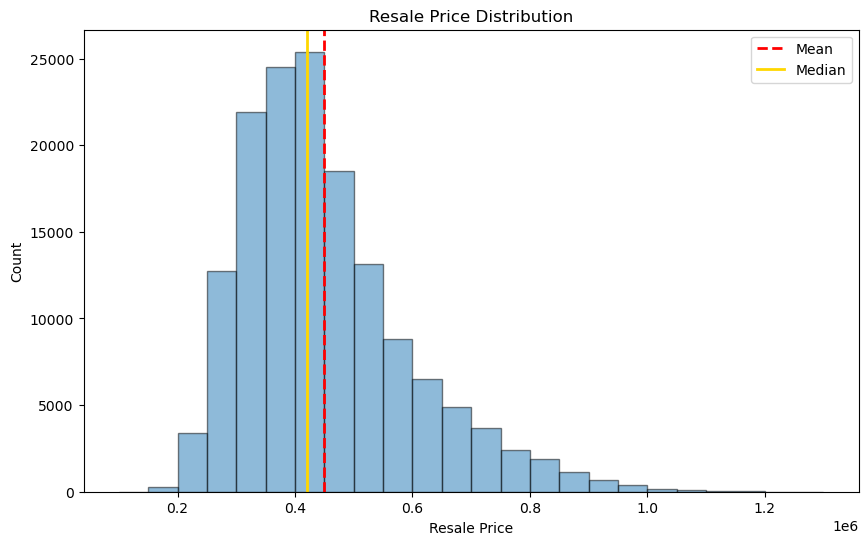

In [30]:
# Based on the median and mean, make a graph

# Create resale price distribution graph
plt.figure(figsize=(10, 6))
plt.hist(train_df["resale_price"], bins=[100_000,150_000,200_000,250_000,300_000,350_000,400_000,
                                         450_000,500_000,550_000,600_000,650_000,700_000,
                                         750_000,800_000,850_000,900_000,950_000,1_000_000,
                                         1_050_000,1_100_000,1_200_000,1_250_000,1_300_000
                                        ], edgecolor="black", alpha = 0.5);
plt.axvline(train_df["resale_price"].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
plt.axvline(train_df["resale_price"].median(), color='gold', linestyle='-', linewidth=2, label='Median')
plt.title("Resale Price Distribution")
plt.xlabel("Resale Price")
plt.ylabel("Count")
plt.legend()

Median $420,000 separates the higher half from the lower half of the resale price.  


So half transaction is below $420,000 and half is above.  


Mean $488,866 is slightly higher than the median, means right skewed.  


Text(0.5, 1.0, 'Resale Price by Town Boxplot')

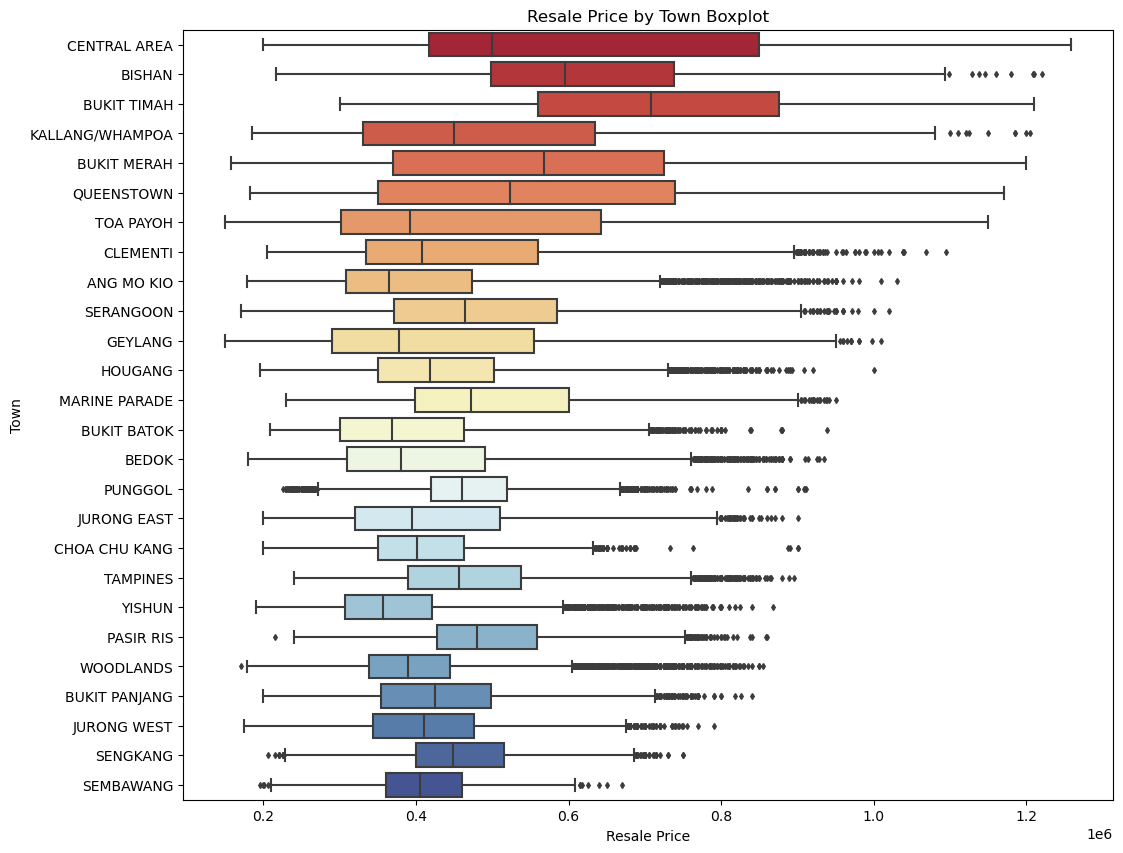

In [31]:
# Ignore warning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set red to blue
custom_palette = sns.color_palette("RdYlBu", n_colors=26)
# custom_palette = custom_palette[::-1]

# Create resale price by town boxplot
plt.figure(figsize=(12,10))
sns.boxplot(x="resale_price", y='town', data=train_df.sort_values(by="resale_price", ascending=False), orient='h', fliersize=3, palette=custom_palette)
plt.xlabel("Resale Price");
plt.ylabel("Town");  
plt.title("Resale Price by Town Boxplot")


Text(0.5, 1.0, 'Resale Price by Planning Area Boxplot')

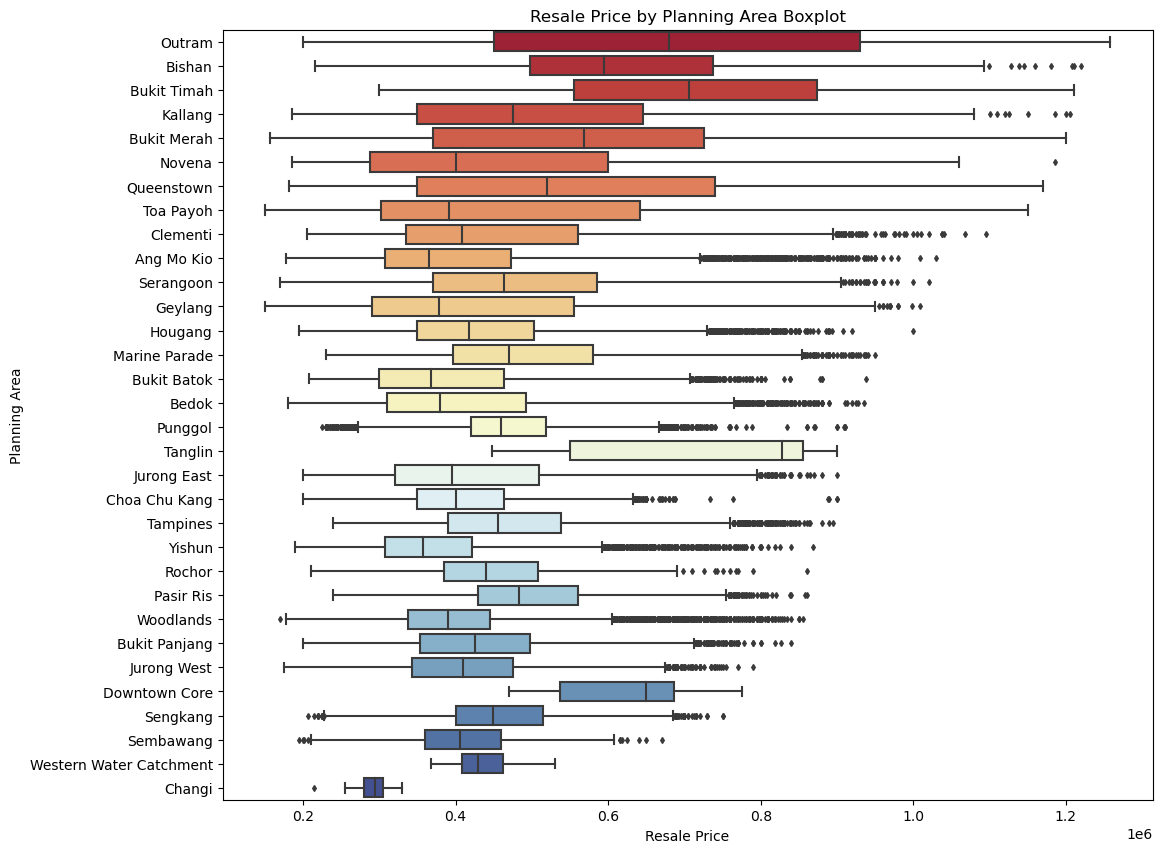

In [32]:
# Ignore warning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set red to blue
custom_palette = sns.color_palette("RdYlBu", n_colors=32)
# custom_palette = custom_palette[::-1]

# Create resale price by planning_area boxplot
plt.figure(figsize=(12,10))
sns.boxplot(x="resale_price", y='planning_area', data=train_df.sort_values(by="resale_price", ascending=False), orient='h', fliersize=3, palette=custom_palette)
plt.xlabel("Resale Price");
plt.ylabel("Planning Area");  
plt.title("Resale Price by Planning Area Boxplot")

There are more planning_area (32) than town (26):
* **Outram** and **Rochor** planning_area are in **CENTRAL AREA** town
* **Downtown Core** planning area can be either in **CENTRAL AREA** or **KALLNG/WHAMPOA** town
* **Novena** and **Kallang** planning area are in **KALLNG/WHAMPOA** town
* **Pasir Ris** and **Changi** planning_area are in **PASIR RIS** town
* **Western Water Catchment** planning area is in **CHOA CHU KANG** town

From the boxplot we can see that there are many outliers

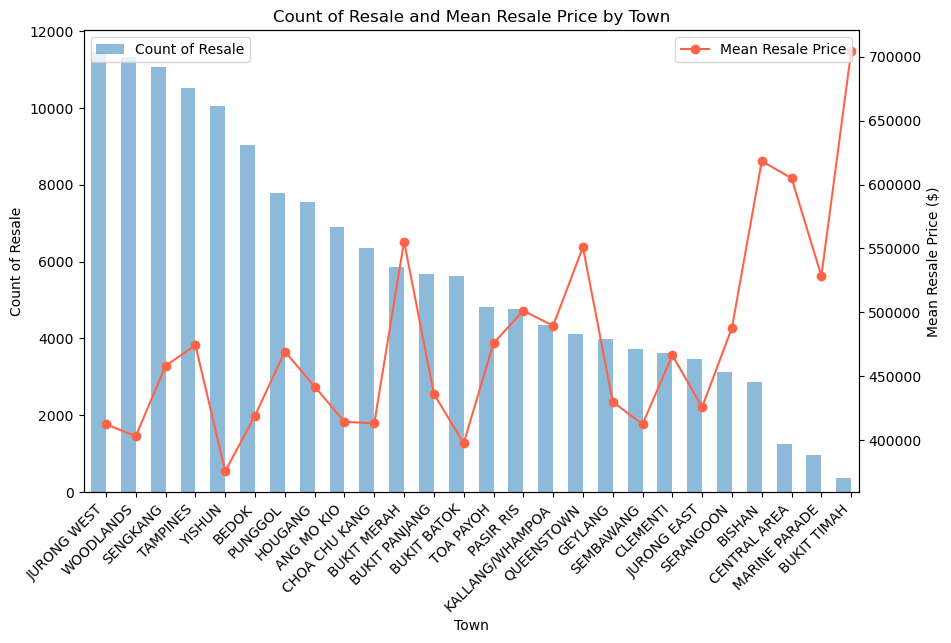

In [33]:
# Group by town
resale_groupby_town = train_df.groupby("town").agg({"resale_price":["count","mean"]}).reset_index()
resale_groupby_town.columns = ["town", "count", "mean_price"]

resale_groupby_town.sort_values(by="count", ascending=False, inplace=True)
resale_groupby_town.reset_index(inplace=True)

# Create count of resale bar graph with mean resale price line chart
fig, ax1 = plt.subplots(figsize=(10,6))
resale_groupby_town.plot(kind="bar", x="town", y="count", ax=ax1, color="tab:blue", position=1, label="Count of Resale", alpha=0.5)
ax2 = ax1.twinx()
resale_groupby_town.plot(kind="line", x="town", y="mean_price", ax=ax2, color="tomato", marker="o", label="Mean Resale Price")

ax1.set_title("Count of Resale and Mean Resale Price by Town")
ax1.set_xlabel("Town")
ax1.set_ylabel("Count of Resale")
ax2.set_ylabel("Mean Resale Price ($)")
ax1.set_xticklabels(resale_groupby_town['town'], rotation=45, ha='right')
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

Jurong West has the highest transaction count, while Bukit Timah has the lowest transaction count.  
Yishun has the lowest mean resale price, while Bukit Timah has the highest mean resale price

In [34]:
train_df["flat_type"].unique()

array(['4 ROOM', '5 ROOM', 'EXECUTIVE', '3 ROOM', '2 ROOM', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

Text(0.5, 1.0, 'Distribution of resale price across flat types')

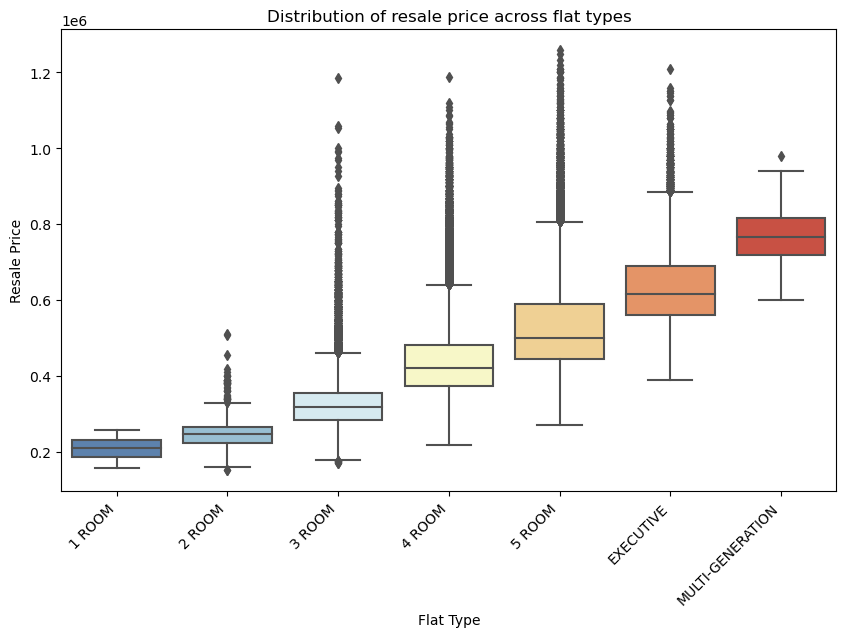

In [35]:
# Set xticks
flat_type_order = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']

# Set red to blue
custom_palette = sns.color_palette("RdYlBu", n_colors=7)
inverted_palette = custom_palette[::-1]

#Create flat_type boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, y='resale_price', x = 'flat_type', order = flat_type_order, palette=inverted_palette)

plt.ylabel("Resale Price")
plt.xlabel("Flat Type")
plt.xticks(rotation=45, ha='right')

plt.title('Distribution of resale price across flat types')

There are a lot outliers found.

### 3.2 Explore Correlation

In [36]:
train_df.head()

,id,tranc_yearmonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,tranc_year,tranc_month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,latitude,longitude,planning_area,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,city_distance
0,88471,2016-05-01,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,2016,5,11,10,12,11,4 ROOM Model A,"3B, UPP BOON KENG RD",968.760,701.928238,15,25,2005,0,0,0,0,142,0,0,0,96,46,0,0,0,0,0,0,0,382003,1.314299,103.872828,Kallang,1094.090418,0.0,0.0,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.311540,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504,4.223704
1,122598,2012-07-01,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.320,475.230826,34,9,1987,0,0,0,0,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,0.0,1.0,3.0,640.151925,0.0,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892,7.027402
2,170897,2013-07-01,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,838000.0,2013,7,14,13,15,14,EXECUTIVE Apartment,"289B, BT BATOK ST 25",1550.016,540.639580,24,16,1996,0,0,0,0,90,0,0,0,0,30,60,0,0,0,0,0,0,651289,1.343867,103.760535,Bukit Batok,1459.579948,0.0,0.0,4.0,1762.082341,0.0,0.0,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,Blk 289E,1.344064,103.758613,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013,12.149659
3,86070,2012-04-01,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,550000.0,2012,4,3,1,5,3,4 ROOM Model A,"232, BISHAN ST 22",1108.692,496.080066,29,11,1990,1,0,0,0,75,0,0,0,68,7,0,0,0,0,0,0,0,570232,1.358245,103.845504,Bishan,950.175199,0.0,1.0,4.0,726.215262,0.0,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,Opp Bishan Nth Shop Mall,1.358045,103.845169,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934,8.391652
4,153632,2017-12-01,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,298000.0,2017,12,2,1,3,2,4 ROOM Simplified,"876, YISHUN ST 81",893.412,333.552717,34,4,1987,0,0,0,0,48,0,0,0,30,18,0,0,0,0,0,0,0,760876,1.414745,103.835532,Yishun,729.771895,0.0,1.0,2.0,1540.151439,0.0,0.0,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,Blk 873,1.415424,103.836477,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335,14.753850


In [37]:
# Select numeric columns only
num_col = train_df.select_dtypes(include=["int","float"])

num_col.columns

Index(['id', 'floor_area_sqm', 'lease_commence_date', 'resale_price',
       'tranc_year', 'tranc_month', 'mid_storey', 'lower', 'upper', 'mid',
       'floor_area_sqft', 'price_per_sqft', 'hdb_age', 'max_floor_lvl',
       'year_completed', 'commercial', 'market_hawker', 'multistorey_carpark',
       'precinct_pavilion', 'total_dwelling_units', '1room_sold', '2room_sold',
       '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'latitude', 'longitude', 'mall_nearest_distance',
       'mall_within_500m', 'mall_within_1km', 'mall_within_2km',
       'hawker_nearest_distance', 'hawker_within_500m', 'hawker_within_1km',
       'hawker_within_2km', 'hawker_food_stalls', 'hawker_market_stalls',
       'mrt_nearest_distance', 'bus_interchange', 'mrt_interchange',
       'mrt_latitude', 'mrt_longitude', 'bus_stop_nearest_distance',
       'bus_stop_latitude', 'bus_

In [38]:
col_list = ['resale_price','price_per_sqft', 'floor_area_sqft', 'city_distance', 
            'lease_commence_date', 'tranc_year', 'mid_storey', 'max_floor_lvl',
            'commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion', 'total_dwelling_units',
            'mall_nearest_distance', 'mall_within_1km',
            'hawker_nearest_distance', 'hawker_within_1km',
            'mrt_interchange', 'mrt_nearest_distance', 
            'bus_interchange', 'bus_stop_nearest_distance', 'pri_sch_nearest_distance', 'vacancy', 'pri_sch_affiliation', 
            'sec_sch_nearest_dist', 'cutoff_point', 'affiliation'
           ]

In [39]:
train_filtered_df = train_df[col_list]
train_filtered_df.head()

,resale_price,price_per_sqft,floor_area_sqft,city_distance,lease_commence_date,tranc_year,mid_storey,max_floor_lvl,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,mall_nearest_distance,mall_within_1km,hawker_nearest_distance,hawker_within_1km,mrt_interchange,mrt_nearest_distance,bus_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,affiliation
0,680000.0,701.928238,968.760,4.223704,2006,2016,11,25,0,0,0,0,142,1094.090418,0.0,154.753357,3.0,0,330.083069,0,29.427395,1138.633422,78,1,1138.633422,224,0
1,665000.0,475.230826,1399.320,7.027402,1987,2012,8,9,0,0,0,0,112,866.941448,1.0,640.151925,1.0,1,903.659703,1,58.207761,415.607357,45,1,447.894399,232,0
2,838000.0,540.639580,1550.016,12.149659,1997,2013,14,16,0,0,0,0,90,1459.579948,0.0,1762.082341,0.0,0,1334.251197,1,214.747860,498.849039,39,0,180.074558,188,0
3,550000.0,496.080066,1108.692,8.391652,1992,2012,3,11,1,0,0,0,75,950.175199,1.0,726.215262,1.0,1,907.453484,1,43.396521,389.515528,20,1,389.515528,253,1
4,298000.0,333.552717,893.412,14.753850,1987,2017,2,4,0,0,0,0,48,729.771895,1.0,1540.151439,0.0,0,412.343032,0,129.422752,401.200584,74,0,312.025435,208,0


Text(0.5, 1.0, 'Correlation Heatmap of Resale Price HDB')

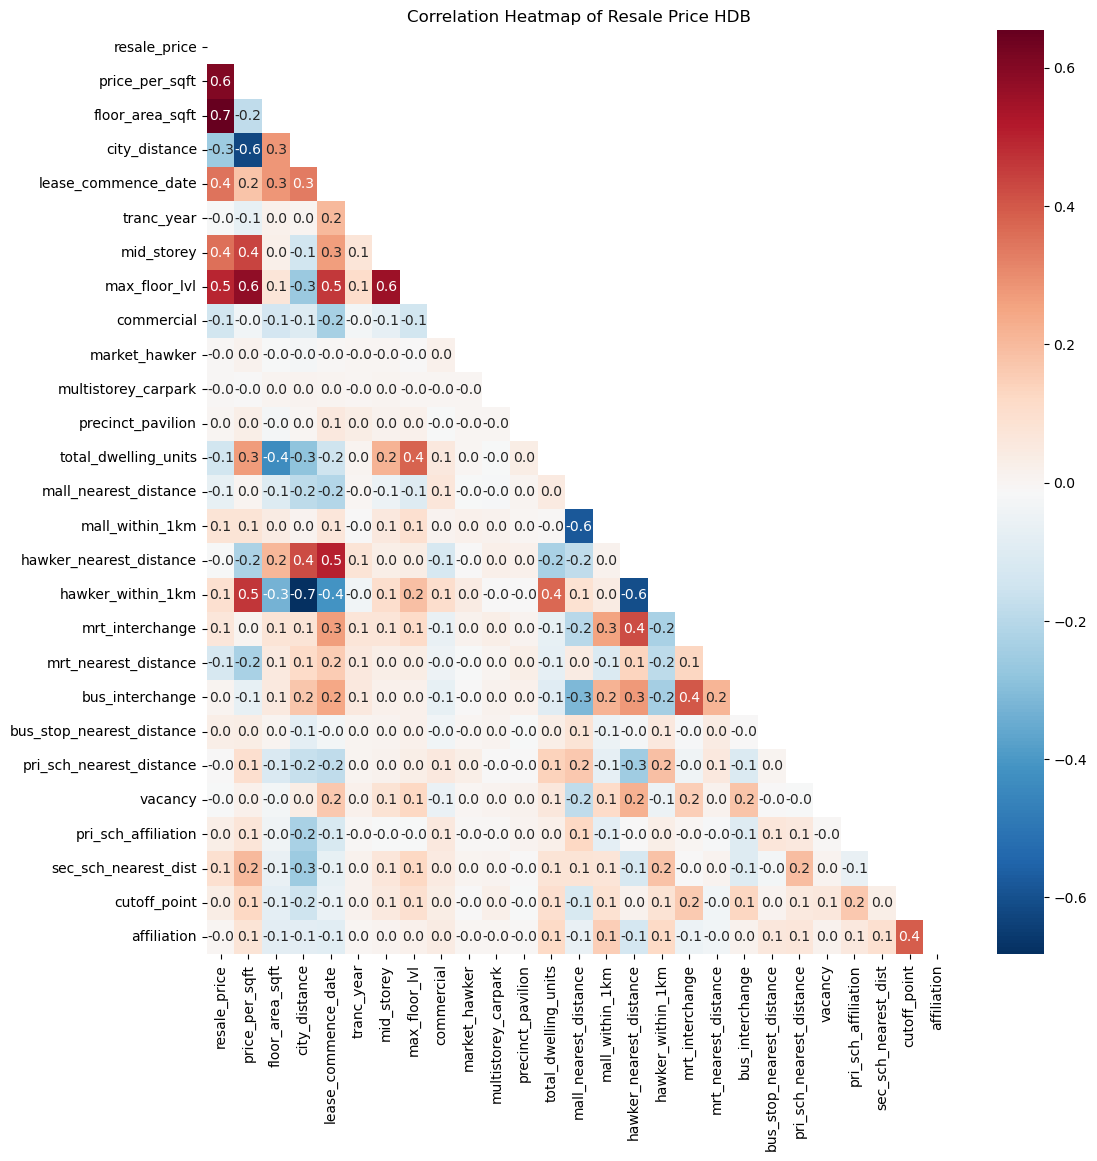

In [40]:
# Heat map 1
plt.figure(figsize=(12,12))
mask = np.triu(np.ones_like(train_filtered_df.corr()))
sns.heatmap(train_filtered_df.corr(), annot = True, fmt=".1f", cmap="RdBu_r", mask=mask);
plt.title("Correlation Heatmap of Resale Price HDB")

Text(0.5, 1.0, 'Correlation Heatmap of Resale Price HDB')

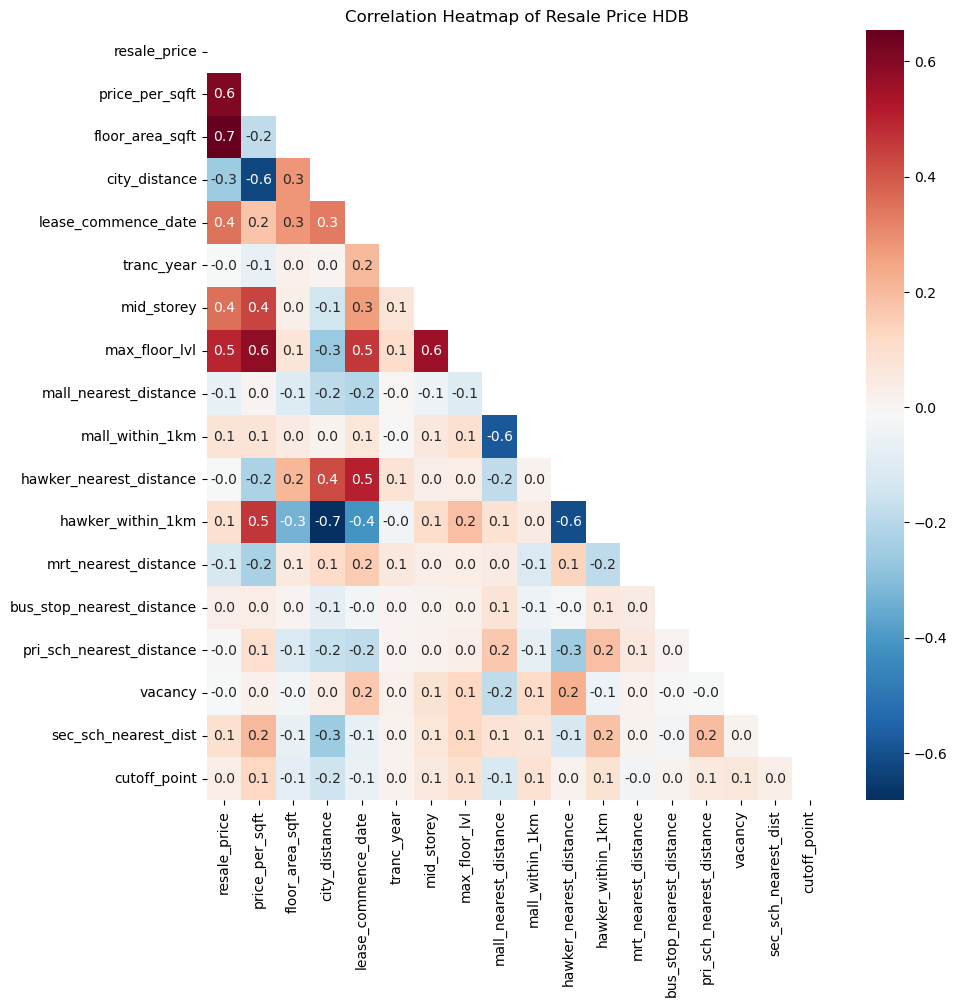

In [41]:
# Heat map 2 without one hot encode.
shorter_col_list = ['resale_price', 'price_per_sqft', 'floor_area_sqft', 'city_distance', 'lease_commence_date', 'tranc_year', 'mid_storey', 'max_floor_lvl',
            'mall_nearest_distance', 'mall_within_1km',
            'hawker_nearest_distance', 'hawker_within_1km',
            'mrt_nearest_distance', 'bus_stop_nearest_distance', 
            'pri_sch_nearest_distance', 'vacancy', 'sec_sch_nearest_dist', 'cutoff_point'
           ]

plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(train_filtered_df[shorter_col_list].corr()))
sns.heatmap(train_filtered_df[shorter_col_list].corr(), annot = True, fmt=".1f", cmap="RdBu_r", mask=mask);
plt.title("Correlation Heatmap of Resale Price HDB")

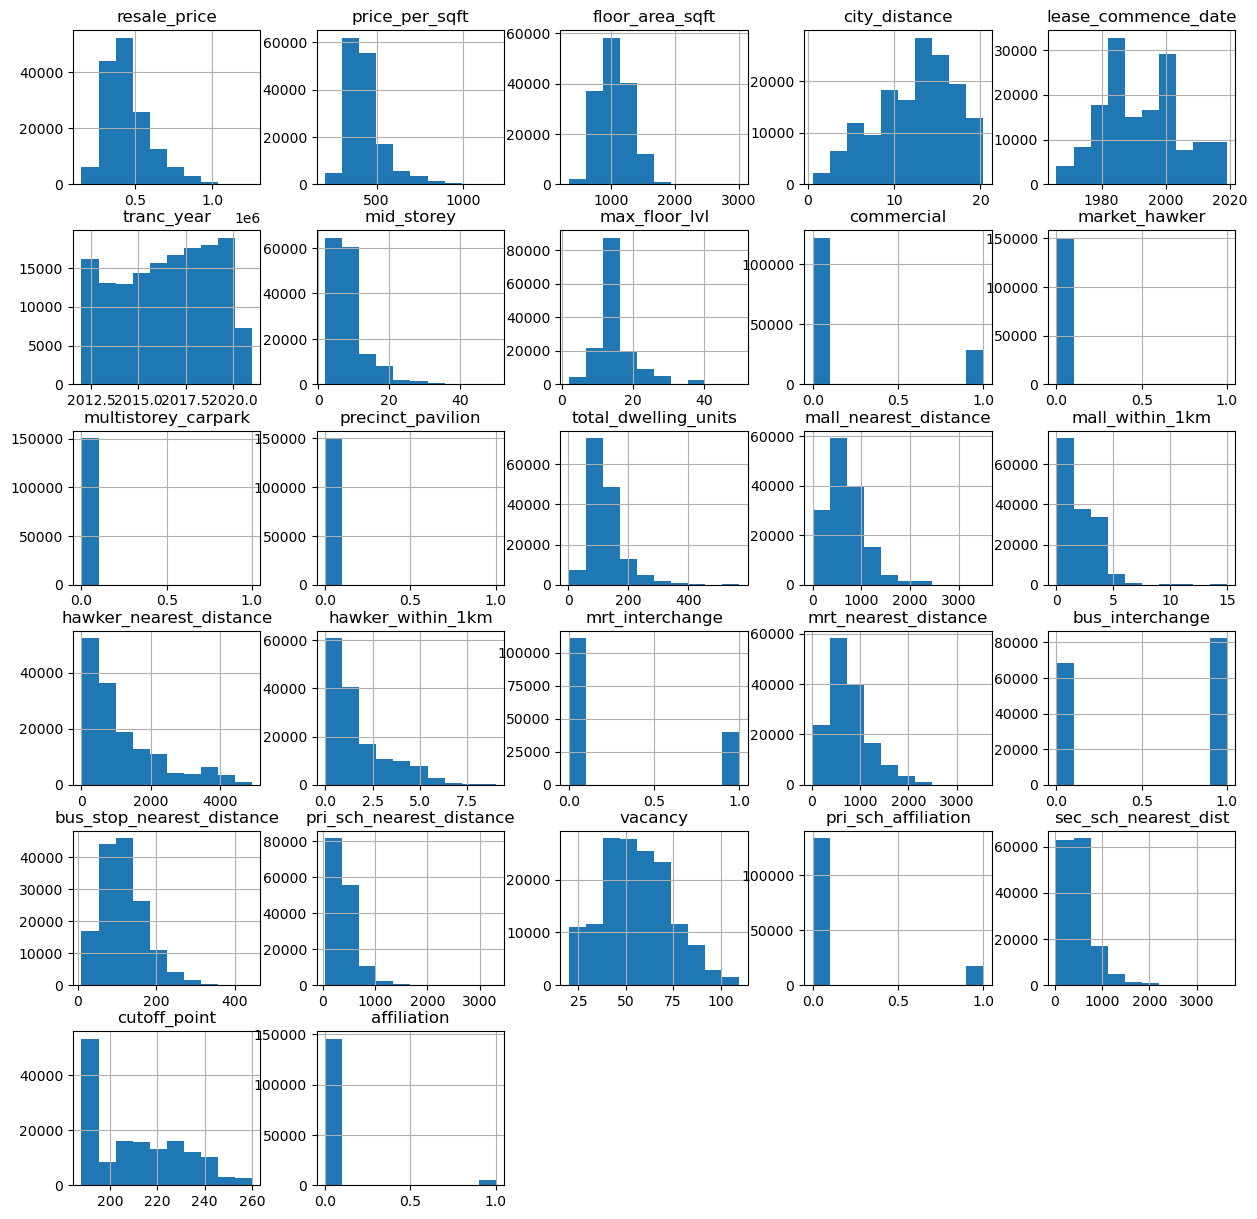

In [42]:
# Histogram to check distribution to apply feature engineering
train_filtered_df.hist(figsize=(15,15));

Text(0.5, 1.0, 'Area Size and Resale Price Correlation')

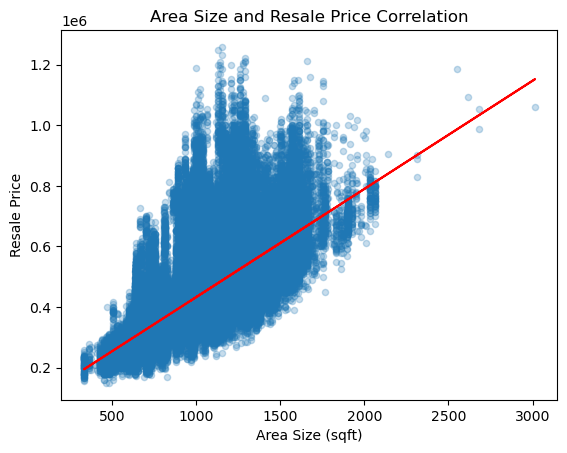

In [43]:
# Lease commence date and resale price correlation
train_filtered_df.plot(x="floor_area_sqft", y="resale_price", kind="scatter", alpha = 0.25)

X = train_filtered_df['floor_area_sqft'].values.reshape(-1,1)
y = train_filtered_df["resale_price"].values.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(X,y)

plt.plot(train_filtered_df["floor_area_sqft"], regressor.predict(X), color = "red", linestyle='-')

plt.xlabel("Area Size (sqft)")
plt.ylabel("Resale Price")
plt.title("Area Size and Resale Price Correlation")

Text(0.5, 1.0, 'Lease Commence Year and Price Per SQFT Correlation')

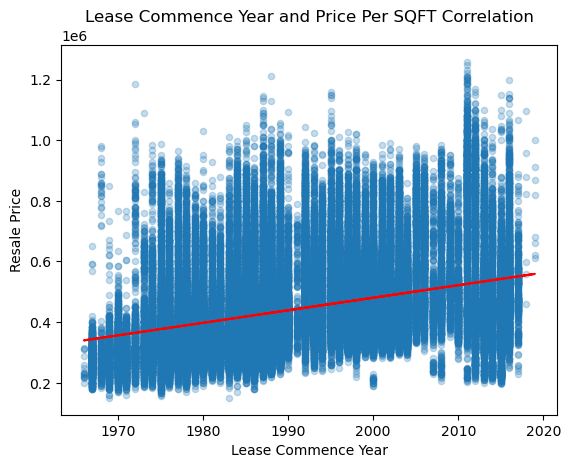

In [44]:
# Lease commence date and resale price correlation

train_filtered_df.plot(x="lease_commence_date", y="resale_price", kind="scatter", alpha = 0.25)

X = train_filtered_df['lease_commence_date'].values.reshape(-1,1)
y = train_filtered_df["resale_price"].values.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(X,y)

plt.plot(train_filtered_df["lease_commence_date"], regressor.predict(X), color = "red", linestyle='-')

plt.xlabel("Lease Commence Year")
plt.ylabel("Resale Price")
plt.title("Lease Commence Year and Price Per SQFT Correlation")

Newer house has higher resale price

Text(0.5, 1.0, 'Distance to City and Price Per SQFT Correlation')

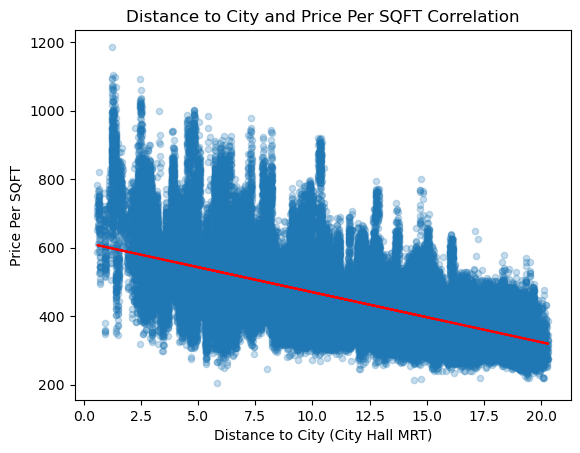

In [45]:
# Distance to city and price per sqft correlation

train_filtered_df.plot(x="city_distance", y="price_per_sqft", kind="scatter", alpha = 0.25)

X = train_filtered_df['city_distance'].values.reshape(-1,1)
y = train_filtered_df["price_per_sqft"].values.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(X,y)

plt.plot(train_filtered_df["city_distance"], regressor.predict(X), color = "red", linestyle='-')

plt.xlabel("Distance to City (City Hall MRT)")
plt.ylabel("Price Per SQFT")
plt.title("Distance to City and Price Per SQFT Correlation")

Further from city means lower price per sqft

In [46]:
# Export
col_list = ['resale_price','price_per_sqft', 'floor_area_sqft', 'planning_area', 'city_distance', 
            'lease_commence_date', 'tranc_year', 'mid_storey', 'max_floor_lvl',
            'commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion', 'total_dwelling_units',
            'mall_nearest_distance', 'mall_within_1km',
            'hawker_nearest_distance', 'hawker_within_1km',
            'mrt_interchange', 'mrt_nearest_distance', 
            'bus_interchange', 'bus_stop_nearest_distance', 'pri_sch_nearest_distance', 'vacancy', 'pri_sch_affiliation', 
            'sec_sch_nearest_dist', 'cutoff_point', 'affiliation',
            'flat_type'
           ]
train_filtered_df = train_df[col_list]

In [47]:
# Export csv to start on feature engineering and model
train_filtered_df.to_csv("../data/train_filtered_1.csv", index=False)

## 4 Cleaning Test DF

### 4.1 Clean Test DF to Match Train DF

In [48]:
# Clean up test
test_df = pd.read_csv("../data/test.csv")
test_df.head()

C:\Users\MichaelKS\AppData\Local\Temp\ipykernel_7220\500329797.py:2: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv("../data/test.csv")


,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,114982,2012-11,YISHUN,4 ROOM,173,YISHUN AVE 7,07 TO 09,84.0,Simplified,1987,2012,11,8,7,9,8,4 ROOM Simplified,"173, YISHUN AVE 7",904.176,399.258551,34,12,1986,Y,Y,N,N,N,132,0,0,0,92,40,0,0,0,0,0,0,0,760173,1.437066,103.831121,Yishun,877.431572,NaN,2.0,4.0,687.576779,NaN,1.0,1.0,56,123,686.660434,Canberra,0,0,1.443077,103.829703,75.683952,Blk 174,1.437558,103.831591,426.467910,Ahmad Ibrahim Primary School,92,0,1.433681,103.832924,156.322353,Ahmad Ibrahim Secondary School,218,0,1.436235,103.829987
1,95653,2019-08,JURONG WEST,5 ROOM,986C,JURONG WEST ST 93,04 TO 06,112.0,Premium Apartment,2008,2019,8,5,4,6,5,5 ROOM Premium Apartment,"986C, JURONG WEST ST 93",1205.568,398.152572,13,14,2002,Y,N,N,N,N,53,0,0,0,28,25,0,0,0,0,0,0,0,643986,1.336957,103.695668,Jurong West,534.037705,NaN,1.0,3.0,2122.346226,NaN,NaN,NaN,72,94,169.478175,Pioneer,0,0,1.337343,103.697143,88.993058,Blk 653B,1.336491,103.696319,439.756851,Jurong West Primary School,45,0,1.339244,103.698896,739.371688,Jurong West Secondary School,199,0,1.335256,103.702098
2,40303,2013-10,ANG MO KIO,3 ROOM,534,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,2013,10,8,7,9,8,3 ROOM New Generation,"534, ANG MO KIO AVE 10",731.952,479.386626,41,12,1979,Y,N,N,N,N,218,0,0,191,22,1,1,0,0,0,0,3,0,560534,1.374058,103.854168,Ang Mo Kio,817.050453,NaN,2.0,3.0,152.287621,1.0,3.0,11.0,50,100,694.220448,Ang Mo Kio,1,0,1.369465,103.849939,86.303575,Blk 532,1.374255,103.854919,355.882207,Jing Shan Primary School,36,0,1.371893,103.851811,305.071191,Anderson Secondary School,245,0,1.374242,103.851430
3,109506,2017-10,WOODLANDS,4 ROOM,29,MARSILING DR,01 TO 03,97.0,New Generation,1979,2017,10,2,1,3,2,4 ROOM New Generation,"29, MARSILING DR",1044.108,306.481705,42,14,1976,Y,N,N,N,N,104,0,0,0,104,0,0,0,0,0,0,0,0,731029,1.442748,103.772922,Woodlands,1272.737194,NaN,NaN,3.0,501.892158,NaN,1.0,2.0,52,112,1117.203587,Marsiling,0,0,1.432757,103.773982,108.459039,Blk 32,1.443650,103.773295,929.744711,Marsiling Primary School,54,0,1.434423,103.773698,433.454591,Woodlands Secondary School,188,0,1.439183,103.774499
4,100149,2016-08,BUKIT BATOK,4 ROOM,170,BT BATOK WEST AVE 8,16 TO 18,103.0,Model A,1985,2016,8,17,16,18,17,4 ROOM Model A,"170, BT BATOK WEST AVE 8",1108.692,360.784600,36,25,1985,Y,N,N,N,N,144,0,0,0,48,96,0,0,0,0,0,0,0,650170,1.346556,103.740101,Bukit Batok,1070.963675,NaN,NaN,5.0,437.593564,1.0,2.0,2.0,60,87,987.976010,Chinese Garden,0,0,1.342441,103.732225,113.645431,Blk 169,1.346899,103.741064,309.926934,Princess Elizabeth Primary School,40,0,1.349195,103.741000,217.295361,Bukit Batok Secondary School,223,0,1.348351,103.740873


In [49]:
# Change all columns to lowercase
test_df.columns = test_df.columns.str.lower()
test_df.columns

Index(['id', 'tranc_yearmonth', 'town', 'flat_type', 'block', 'street_name',
       'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'tranc_year', 'tranc_month', 'mid_storey', 'lower', 'upper', 'mid',
       'full_flat_type', 'address', 'floor_area_sqft', 'price_per_sqft',
       'hdb_age', 'max_floor_lvl', 'year_completed', 'residential',
       'commercial', 'market_hawker', 'multistorey_carpark',
       'precinct_pavilion', 'total_dwelling_units', '1room_sold', '2room_sold',
       '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'postal', 'latitude', 'longitude', 'planning_area',
       'mall_nearest_distance', 'mall_within_500m', 'mall_within_1km',
       'mall_within_2km', 'hawker_nearest_distance', 'hawker_within_500m',
       'hawker_within_1km', 'hawker_within_2km', 'hawker_food_stalls',
       'hawker_market_stalls', '

In [50]:
# Check number of null
test_df.isnull().sum()[test_df.isnull().sum()>0]

mall_nearest_distance       84
mall_within_500m         10292
mall_within_1km           2786
mall_within_2km            213
hawker_within_500m       10755
hawker_within_1km         6729
hawker_within_2km         3254
dtype: int64

In [51]:
# Replace null with 0 for malls within 500-2km
test_df.fillna(value = {"mall_within_500m":0, "mall_within_1km":0, "mall_within_2km":0}, inplace=True)

In [52]:
# Replace null with 0 for hawkers within 500-2km
test_df.fillna(value = {"hawker_within_500m":0, "hawker_within_1km":0, "hawker_within_2km":0}, inplace=True)

In [53]:
# Saving mall_nearest_distance Null index, to revert back in the future
test_mall_dist_null_index = test_df["mall_nearest_distance"][test_df["mall_nearest_distance"].isnull()==1].index

# average distance above 2km
test_mean_mall_dist_above_2k = test_df["mall_nearest_distance"][test_df["mall_nearest_distance"]>2000].mean()

# Replace null with average distance above 2km
test_df["mall_nearest_distance"] = test_df["mall_nearest_distance"].fillna(test_mean_mall_dist_above_2k)

In [54]:
# Convert to datetime format
test_df["tranc_yearmonth"] = pd.to_datetime(test_df["tranc_yearmonth"], format = "%Y-%m")

In [55]:
# Create function to check if str value is numeric
def check_str_num(value):
    try:
        float(value)
        return True
    except ValueError:
        return False
    
# Test postal
non_num_postal = train_df["postal"].apply(check_str_num)

test_df["postal"][non_num_postal == False].count()

0

In [56]:
# Check column with "Y" and "N"
check_y = test_df.apply(lambda col: col == 'Y')
columns_y = test_df.columns[check_y.any()]
print(f"Collumns with Y : {columns_y}")

check_n = test_df.apply(lambda col: col == 'N')
columns_n = test_df.columns[check_n.any()]
print(f"Collumns with Y : {columns_n}")

Collumns with Y : Index(['residential', 'commercial', 'multistorey_carpark',
       'precinct_pavilion'],
      dtype='object')
Collumns with Y : Index(['commercial', 'market_hawker', 'multistorey_carpark',
       'precinct_pavilion'],
      dtype='object')


In [57]:
# Since column with "Y" has 1 more column call residential. Check
for i in test_df[["residential", "commercial", "market_hawker", "multistorey_carpark", "precinct_pavilion"]]:
    print(i, test_df[i].unique())

residential ['Y']
commercial ['Y' 'N']
market_hawker ['N']
multistorey_carpark ['N' 'Y']
precinct_pavilion ['N' 'Y']


In [58]:
# Drop residential because all is residential
test_df.drop("residential", axis=1, inplace=True)

In [59]:
# Fix Y and N value first. We will drop residential later since all are residential
test_df.replace({ "commercial" : {"Y":1, "N":0},
                  "market_hawker" : {"Y":1, "N":0}, 
                  "multistorey_carpark" : {"Y":1, "N":0}, 
                  "precinct_pavilion" : {"Y":1, "N":0}                  
                 }, inplace=True)

# # Drop residential because all is residential
# train_df.drop("residential", axis=1, inplace=True)

train_df.head()

,id,tranc_yearmonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,tranc_year,tranc_month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,latitude,longitude,planning_area,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,city_distance
0,88471,2016-05-01,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,2016,5,11,10,12,11,4 ROOM Model A,"3B, UPP BOON KENG RD",968.760,701.928238,15,25,2005,0,0,0,0,142,0,0,0,96,46,0,0,0,0,0,0,0,382003,1.314299,103.872828,Kallang,1094.090418,0.0,0.0,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.311540,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504,4.223704
1,122598,2012-07-01,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.320,475.230826,34,9,1987,0,0,0,0,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,0.0,1.0,3.0,640.151925,0.0,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892,7.027402
2,170897,2013-07-01,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,838000.0,2013,7,14,13,15,14,EXECUTIVE Apartment,"289B, BT BATOK ST 25",1550.016,540.639580,24,16,1996,0,0,0,0,90,0,0,0,0,30,60,0,0,0,0,0,0,651289,1.343867,103.760535,Bukit Batok,1459.579948,0.0,0.0,4.0,1762.082341,0.0,0.0,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,Blk 289E,1.344064,103.758613,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013,12.149659
3,86070,2012-04-01,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,550000.0,2012,4,3,1,5,3,4 ROOM Model A,"232, BISHAN ST 22",1108.692,496.080066,29,11,1990,1,0,0,0,75,0,0,0,68,7,0,0,0,0,0,0,0,570232,1.358245,103.845504,Bishan,950.175199,0.0,1.0,4.0,726.215262,0.0,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,Opp Bishan Nth Shop Mall,1.358045,103.845169,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934,8.391652
4,153632,2017-12-01,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,298000.0,2017,12,2,1,3,2,4 ROOM Simplified,"876, YISHUN ST 81",893.412,333.552717,34,4,1987,0,0,0,0,48,0,0,0,30,18,0,0,0,0,0,0,0,760876,1.414745,103.835532,Yishun,729.771895,0.0,1.0,2.0,1540.151439,0.0,0.0,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,Blk 873,1.415424,103.836477,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335,14.753850


In [60]:
# Add city_distance column
# city_hall_lat = 1.2931
# city_hall_lon = 103.8520

# Use Raffles Place MRT coordinate, change variable to just city_lat and city_lon
city_lat = 1.2830
city_lon = 103.8513

test_df["city_distance"] = test_df.apply(lambda row: haversine(city_lat, city_lon, row['latitude'], row['longitude']), axis=1)

# Check city_distance column
test_df[["town","city_distance"]].head()

,town,city_distance
0,YISHUN,17.277628
1,JURONG WEST,18.311735
2,ANG MO KIO,10.130258
3,WOODLANDS,19.784959
4,BUKIT BATOK,14.239005


In [61]:
test_flat_type_dummies = pd.get_dummies(test_df["flat_type"], prefix = "type")
test_df = pd.concat([test_df, test_flat_type_dummies], axis=1)
test_df.iloc[:,-7:] = test_df.iloc[:,-7:].astype(int)
test_df.head()

,id,tranc_yearmonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,tranc_year,tranc_month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,...,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,city_distance,type_1 ROOM,type_2 ROOM,type_3 ROOM,type_4 ROOM,type_5 ROOM,type_EXECUTIVE,type_MULTI-GENERATION
0,114982,2012-11-01,YISHUN,4 ROOM,173,YISHUN AVE 7,07 TO 09,84.0,Simplified,1987,2012,11,8,7,9,8,4 ROOM Simplified,"173, YISHUN AVE 7",904.176,399.258551,34,12,1986,1,0,0,0,132,0,0,0,92,40,0,0,0,0,0,0,0,...,877.431572,0.0,2.0,4.0,687.576779,0.0,1.0,1.0,56,123,686.660434,Canberra,0,0,1.443077,103.829703,75.683952,Blk 174,1.437558,103.831591,426.467910,Ahmad Ibrahim Primary School,92,0,1.433681,103.832924,156.322353,Ahmad Ibrahim Secondary School,218,0,1.436235,103.829987,17.277628,0,0,0,1,0,0,0
1,95653,2019-08-01,JURONG WEST,5 ROOM,986C,JURONG WEST ST 93,04 TO 06,112.0,Premium Apartment,2008,2019,8,5,4,6,5,5 ROOM Premium Apartment,"986C, JURONG WEST ST 93",1205.568,398.152572,13,14,2002,0,0,0,0,53,0,0,0,28,25,0,0,0,0,0,0,0,...,534.037705,0.0,1.0,3.0,2122.346226,0.0,0.0,0.0,72,94,169.478175,Pioneer,0,0,1.337343,103.697143,88.993058,Blk 653B,1.336491,103.696319,439.756851,Jurong West Primary School,45,0,1.339244,103.698896,739.371688,Jurong West Secondary School,199,0,1.335256,103.702098,18.311735,0,0,0,0,1,0,0
2,40303,2013-10-01,ANG MO KIO,3 ROOM,534,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,2013,10,8,7,9,8,3 ROOM New Generation,"534, ANG MO KIO AVE 10",731.952,479.386626,41,12,1979,0,0,0,0,218,0,0,191,22,1,1,0,0,0,0,3,0,...,817.050453,0.0,2.0,3.0,152.287621,1.0,3.0,11.0,50,100,694.220448,Ang Mo Kio,1,0,1.369465,103.849939,86.303575,Blk 532,1.374255,103.854919,355.882207,Jing Shan Primary School,36,0,1.371893,103.851811,305.071191,Anderson Secondary School,245,0,1.374242,103.851430,10.130258,0,0,1,0,0,0,0
3,109506,2017-10-01,WOODLANDS,4 ROOM,29,MARSILING DR,01 TO 03,97.0,New Generation,1979,2017,10,2,1,3,2,4 ROOM New Generation,"29, MARSILING DR",1044.108,306.481705,42,14,1976,0,0,0,0,104,0,0,0,104,0,0,0,0,0,0,0,0,...,1272.737194,0.0,0.0,3.0,501.892158,0.0,1.0,2.0,52,112,1117.203587,Marsiling,0,0,1.432757,103.773982,108.459039,Blk 32,1.443650,103.773295,929.744711,Marsiling Primary School,54,0,1.434423,103.773698,433.454591,Woodlands Secondary School,188,0,1.439183,103.774499,19.784959,0,0,0,1,0,0,0
4,100149,2016-08-01,BUKIT BATOK,4 ROOM,170,BT BATOK WEST AVE 8,16 TO 18,103.0,Model A,1985,2016,8,17,16,18,17,4 ROOM Model A,"170, BT BATOK WEST AVE 8",1108.692,360.784600,36,25,1985,0,0,0,0,144,0,0,0,48,96,0,0,0,0,0,0,0,...,1070.963675,0.0,0.0,5.0,437.593564,1.0,2.0,2.0,60,87,987.976010,Chinese Garden,0,0,1.342441,103.732225,113.645431,Blk 169,1.346899,103.741064,309.926934,Princess Elizabeth Primary School,40,0,1.349195,103.741000,217.295361,Bukit Batok Secondary School,223,0,1.348351,103.740873,14.239005,0,0,0,1,0,0,0


In [62]:
# Drop columns
test_col_list = ['price_per_sqft', 'floor_area_sqft', 'planning_area', 'city_distance', 
            'lease_commence_date', 'tranc_year', 'mid_storey', 'max_floor_lvl',
            'commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion', 'total_dwelling_units',
            'mall_nearest_distance', 'mall_within_1km',
            'hawker_nearest_distance', 'hawker_within_1km',
            'mrt_interchange', 'mrt_nearest_distance', 
            'bus_interchange', 'bus_stop_nearest_distance', 'pri_sch_nearest_distance', 'vacancy', 'pri_sch_affiliation', 
            'sec_sch_nearest_dist', 'cutoff_point', 'affiliation',
            'flat_type'
           ]
train_filtered_df = train_df[col_list]

test_filtered_df = test_df[test_col_list]
test_filtered_df.head()

,price_per_sqft,floor_area_sqft,planning_area,city_distance,lease_commence_date,tranc_year,mid_storey,max_floor_lvl,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,mall_nearest_distance,mall_within_1km,hawker_nearest_distance,hawker_within_1km,mrt_interchange,mrt_nearest_distance,bus_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,affiliation,flat_type
0,399.258551,904.176,Yishun,17.277628,1987,2012,8,12,1,0,0,0,132,877.431572,2.0,687.576779,1.0,0,686.660434,0,75.683952,426.467910,92,0,156.322353,218,0,4 ROOM
1,398.152572,1205.568,Jurong West,18.311735,2008,2019,5,14,0,0,0,0,53,534.037705,1.0,2122.346226,0.0,0,169.478175,0,88.993058,439.756851,45,0,739.371688,199,0,5 ROOM
2,479.386626,731.952,Ang Mo Kio,10.130258,1980,2013,8,12,0,0,0,0,218,817.050453,2.0,152.287621,3.0,0,694.220448,1,86.303575,355.882207,36,0,305.071191,245,0,3 ROOM
3,306.481705,1044.108,Woodlands,19.784959,1979,2017,2,14,0,0,0,0,104,1272.737194,0.0,501.892158,1.0,0,1117.203587,0,108.459039,929.744711,54,0,433.454591,188,0,4 ROOM
4,360.784600,1108.692,Bukit Batok,14.239005,1985,2016,17,25,0,0,0,0,144,1070.963675,0.0,437.593564,2.0,0,987.976010,0,113.645431,309.926934,40,0,217.295361,223,0,4 ROOM


In [63]:
# Export csv to start on feature engineering and model
test_filtered_df.to_csv("../data/test_filtered_1.csv", index=False)